In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from pandas import DataFrame
import numpy as np
import scipy.stats as stats

In [11]:
TCSR_path = "Input_Files/Tot Constr Spend Resi Quart index2002.csv"
NHSP_path = "Input_Files/Median Sales Price for New Houses Sold Quart index2002.csv"
HSP_path = "Input_Files/Median Sales Price for New Houses Sold Quart index2002.csv"

In [12]:
data1 = pd.read_csv(TCSR_path)
T_data_df = pd.DataFrame(data1)
data2 = pd.read_csv(NHSP_path)
NH_data_df = pd.DataFrame(data2)
data3 = pd.read_csv(HSP_path)
H_data_df = pd.DataFrame(data3)
H_data_df['DATE'] = H_data_df['DATE'].astype('datetime64[D]')
T_data_df['DATE'] = T_data_df['DATE'].astype('datetime64[D]')
NH_data_df['DATE'] = H_data_df['DATE'].astype('datetime64[D]')

In [13]:
merge1 = pd.merge(T_data_df, NH_data_df, how="left", on=["DATE"])
merge1_df = pd.DataFrame(merge1)
TCSR_NHSP_HSP = pd.merge(merge1_df,H_data_df, how="left", on=["DATE"])
TCSR_NHSP_HSP_df = pd.DataFrame(TCSR_NHSP_HSP)
TCSR_NHSP_HSP_df.tail()

,DATE,TLRESCONS_NBD20020101,MSPNHSUS_NBD20020101_x,MSPNHSUS_NBD20020101_y
81,2022-04-01,250.54254,238.88889,238.88889
82,2022-07-01,236.64300,248.61111,248.61111
83,2022-10-01,225.25565,256.16097,256.16097
84,2023-01-01,221.38627,232.24715,232.24715
85,2023-04-01,219.66414,221.38533,221.38533


In [14]:
TCSR_NHSP_HSP_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 0 to 85
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   DATE                    86 non-null     datetime64[ns]
 1   TLRESCONS_NBD20020101   86 non-null     float64       
 2   MSPNHSUS_NBD20020101_x  86 non-null     float64       
 3   MSPNHSUS_NBD20020101_y  86 non-null     float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 3.4 KB


Note***Index (scale value to 100) neutralizies values for new houses sold and houses sold to same even if actual values are slightly different

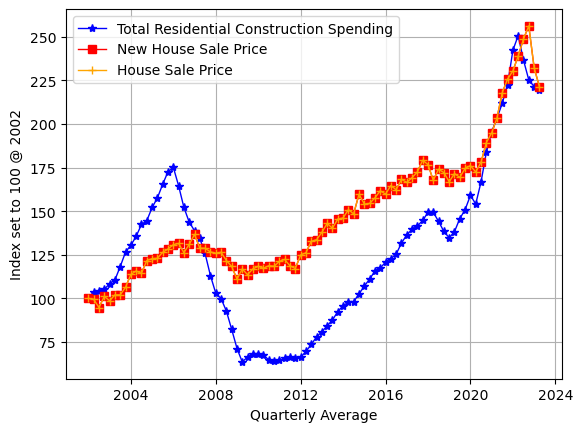

In [15]:
#All data
date = TCSR_NHSP_HSP_df["DATE"]
TCSR = TCSR_NHSP_HSP_df["TLRESCONS_NBD20020101"]
NHSP = TCSR_NHSP_HSP_df["MSPNHSUS_NBD20020101_x"]
HSP = TCSR_NHSP_HSP_df["MSPNHSUS_NBD20020101_y"]

TCSR = plt.plot(date, TCSR, marker="*",color="blue", linewidth=1, label="Total Residential Construction Spending")
NHSP = plt.plot(date, NHSP, marker="s", color="Red", linewidth=1, label="New House Sale Price")
HSP = plt.plot(date, HSP, marker="+",color="orange", linewidth=1, label="House Sale Price")

plt.title("")
plt.ylabel("Index set to 100 @ 2002")
plt.xlabel("Quarterly Average")

plt.legend(loc="best")
plt.grid()

NC_Q = plt.gcf()
plt.show()
NC_Q.savefig("Images/NC_Quarterly.png")

Ttest_indResult(statistic=-3.119357729603467, pvalue=0.0021461880099620996)


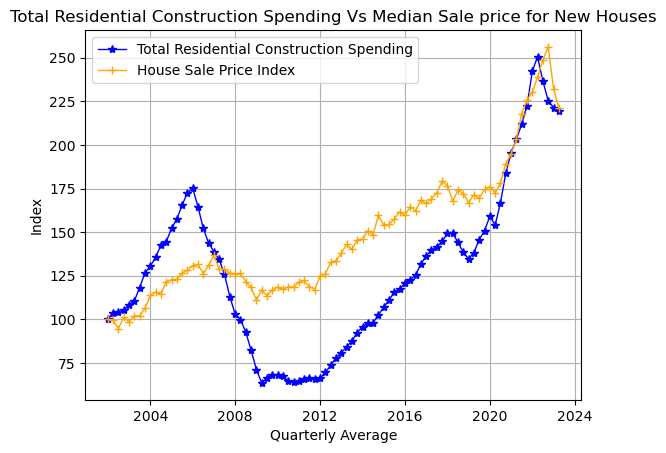

In [16]:
# Total Residential Construction Spending vs Median houses sale price
d = TCSR_NHSP_HSP_df["DATE"]
x = TCSR_NHSP_HSP_df["TLRESCONS_NBD20020101"]
y = TCSR_NHSP_HSP_df["MSPNHSUS_NBD20020101_y"]

plt.plot(d, x, marker="*",color="blue", linewidth=1, label="Total Residential Construction Spending")
plt.plot(d, y, marker="+",color="orange", linewidth=1, label="House Sale Price Index")

plt.title("Total Residential Construction Spending Vs Median Sale price for New Houses")
plt.ylabel("Index")
plt.xlabel("Quarterly Average")

ttest = stats.ttest_ind(x, y, equal_var=False)
print(ttest)

plt.legend(loc="best")
plt.grid()

NC_1Q = plt.gcf()
plt.show()
NC_1Q.savefig("Images/NC_Quarterly1.png")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Ttest_indResult(statistic=-3.119357729603467, pvalue=0.0021461880099620996)


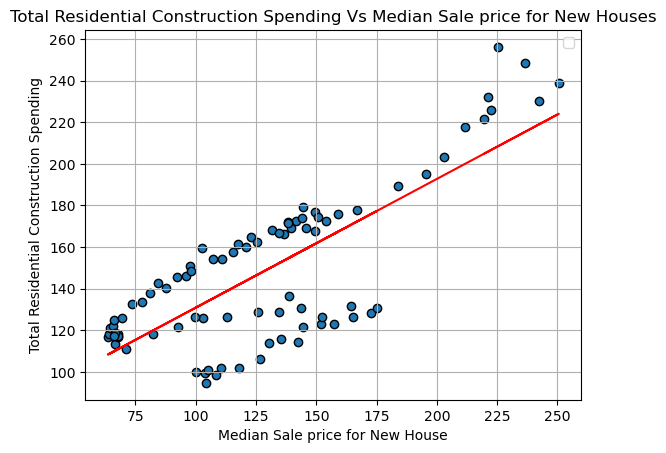

In [17]:
# trying to see line regression with scatter plot
d = TCSR_NHSP_HSP_df["DATE"]
x = TCSR_NHSP_HSP_df["TLRESCONS_NBD20020101"]
y = TCSR_NHSP_HSP_df["MSPNHSUS_NBD20020101_y"]

plt.scatter(x, y, edgecolor="black")

slope, int, r, p, std_err = st.linregress(x, y)
fit = slope * x + int

plt.title("Total Residential Construction Spending Vs Median Sale price for New Houses")
plt.ylabel("Total Residential Construction Spending")
plt.xlabel("Median Sale price for New House")
plt.plot(x,fit, "r-")
ttest = stats.ttest_ind(x, y, equal_var=False)
print(ttest)

plt.legend(loc="best")
plt.grid()

NC_2Q = plt.gcf()
plt.show()
NC_2Q.savefig("Images/NC_Quarterly2.png")

Ttest_indResult(statistic=0.0, pvalue=1.0)


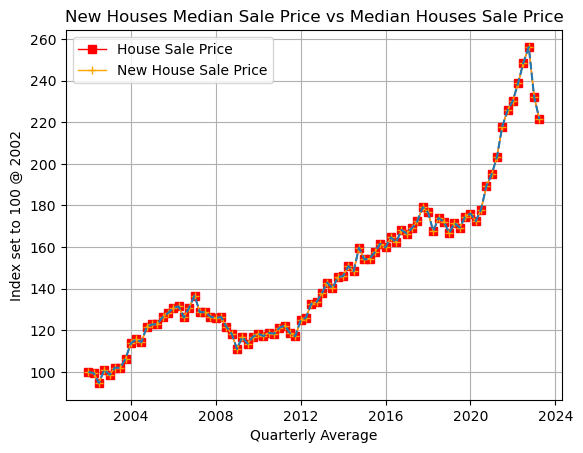

In [18]:
# Comapring Median New houses sale price vs Median houses sale price
d = TCSR_NHSP_HSP_df["DATE"]
x = TCSR_NHSP_HSP_df["MSPNHSUS_NBD20020101_x"]
y = TCSR_NHSP_HSP_df["MSPNHSUS_NBD20020101_y"]

plt.plot(d, x, marker="s",color="Red", linewidth=1, label="House Sale Price");plt.legend(loc="best")
plt.plot(d, y, marker="+", color="Orange", linewidth=1, label="New House Sale Price");plt.legend(loc="best")

slope, int, r, p, std_err = st.linregress(x, y)
fit = slope * y + int

plt.title("New Houses Median Sale Price vs Median Houses Sale Price")
plt.ylabel("Index set to 100 @ 2002")
plt.xlabel("Quarterly Average")
plt.plot(d,fit, "--")

ttest = stats.ttest_ind(x, y, equal_var=False)
print(ttest)
plt.grid()

NC_3Q = plt.gcf()
plt.show()
NC_3Q.savefig("Images/NC_Quarterly3.png")